In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_moons, make_circles

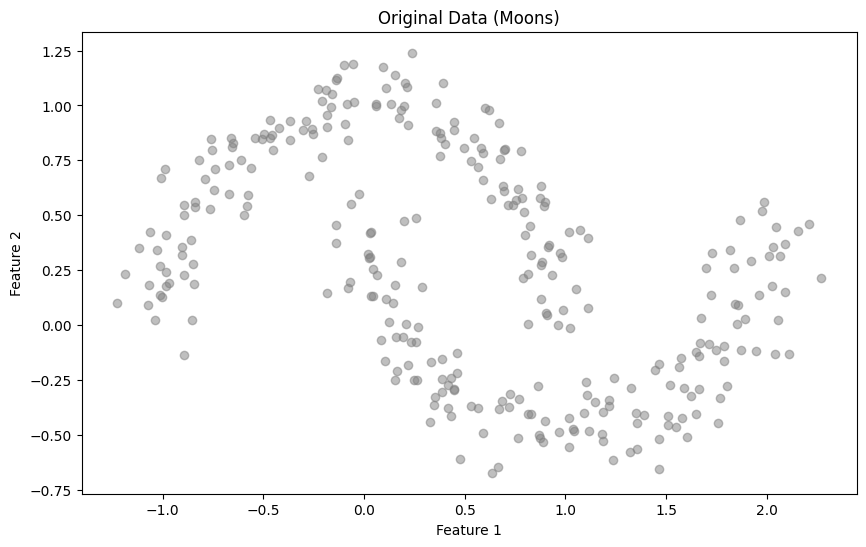

Dataset shape: (300, 2)


In [2]:
X_moons, y_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

plt.figure(figsize=(10, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c='gray', alpha=0.5)
plt.title('Original Data (Moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

print("Dataset shape:", X_moons.shape)

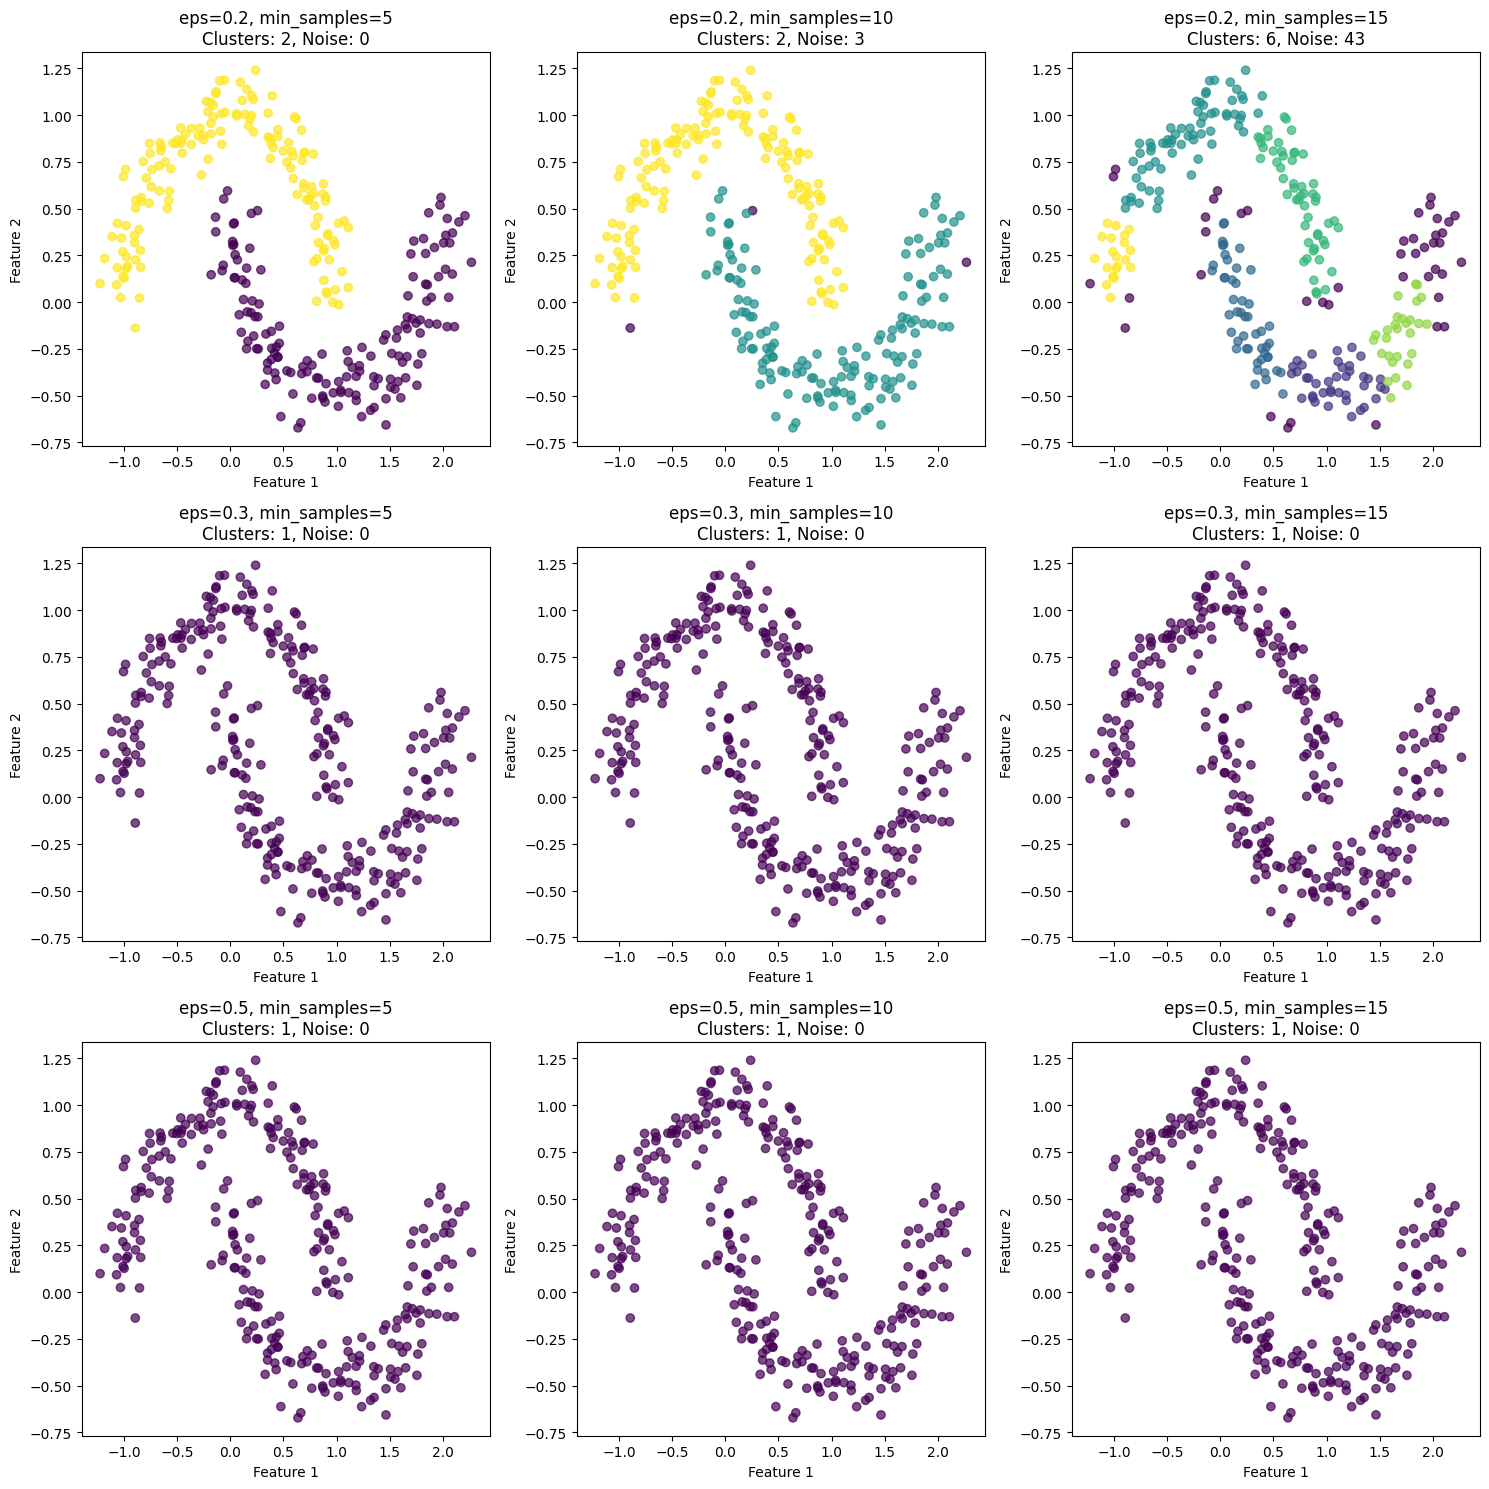

In [3]:
eps_values = [0.2, 0.3, 0.5]
min_samples_values = [5, 10, 15]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_moons)
        
        axes[i, j].scatter(X_moons[:, 0], X_moons[:, 1], c=labels, cmap='viridis', alpha=0.7)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        axes[i, j].set_title(f'eps={eps}, min_samples={min_samples}\nClusters: {n_clusters}, Noise: {n_noise}')
        axes[i, j].set_xlabel('Feature 1')
        axes[i, j].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

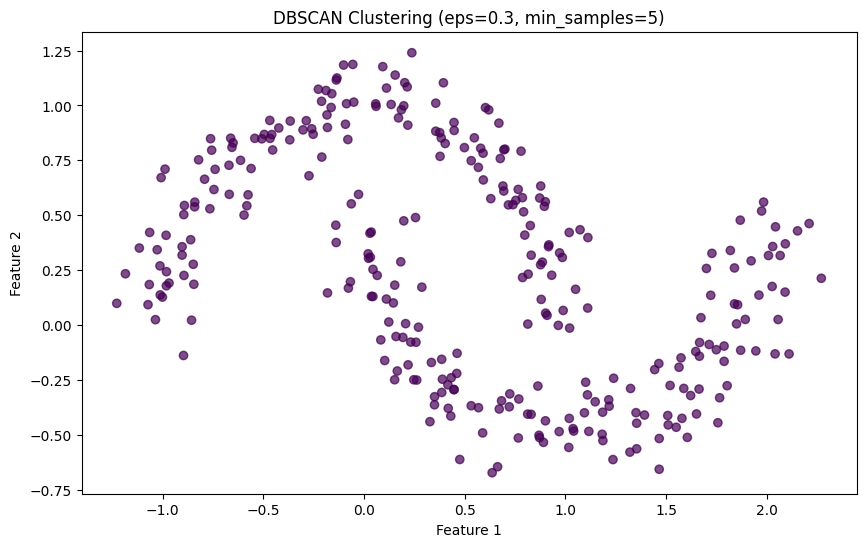


--- DBSCAN Clustering ---
Number of Clusters: 1
Noise Points: 0
Silhouette Score: 0.0000


In [4]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_moons)

plt.figure(figsize=(10, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('DBSCAN Clustering (eps=0.3, min_samples=5)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

mask = labels != -1
if n_clusters > 1 and sum(mask) > n_clusters:
    sil_score = silhouette_score(X_moons[mask], labels[mask])
else:
    sil_score = 0

print(f"\n--- DBSCAN Clustering ---")
print(f"Number of Clusters: {n_clusters}")
print(f"Noise Points: {n_noise}")
print(f"Silhouette Score: {sil_score:.4f}")